# Notebook contains my answers to Shopify's 2021 Data Science Intern Challenge
* Question 1 
* Question 2 (SQL)

## Import Packages

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load Data 

In [2]:
df = pd.read_csv(r"/Users/Shrey/Downloads/2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv")

# Question 1

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. 

Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 
What metric would you report for this dataset?
What is its value?



In [3]:
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [4]:
df.describe()
# Standard Deviations of Order_Amount and Total_Items are massive

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


## Analysis
There are two things that impact A0V:
* price of the shoe
* how many shoes you bought aka total_items in our dataframe

Calculating price of the shoe is easy as every single store only sells one model so we can just divide the order amount by total items per transaction

In [5]:
df['shoe_price'] = df['order_amount'] / df['total_items']

From our boxplot below we can see there are outliers that are massively disrupting our calculation


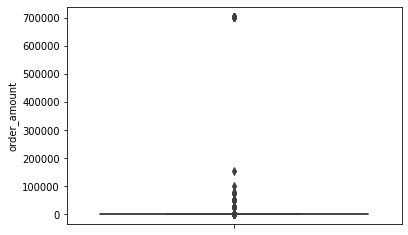

In [6]:
sns.boxplot(y = df['order_amount'])
print('From our boxplot below we can see there are outliers that are massively disrupting our calculation')

### First let us look at shoe_price 

In [7]:
## See five most expensive shoes 
shoe_price_set = set(df['shoe_price'])
shoe_price_list = list(shoe_price_set)
shoe_price_list.sort(reverse=True)
shoe_price_list[0:5]

[25725.0, 352.0, 201.0, 196.0, 195.0]

#### Note that the second most expensive shoe is \\$352 ! A massive drop off from the most expensive of \\$25,725.00
#### We can see that Shop 78 is selling a very expensive shoe of $25,725 which is definitely disrupting our AOV

In [8]:
df.sort_values(by='shoe_price' , ascending = False).head(50)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,shoe_price
4420,4421,78,969,77175,3,debit,2017-03-09 15:21:35,25725.0
2906,2907,78,817,77175,3,debit,2017-03-16 3:45:46,25725.0
4505,4506,78,866,25725,1,debit,2017-03-22 22:06:01,25725.0
493,494,78,983,51450,2,cash,2017-03-16 21:39:35,25725.0
2452,2453,78,709,51450,2,cash,2017-03-27 11:04:04,25725.0
1452,1453,78,812,25725,1,credit_card,2017-03-17 18:09:54,25725.0
3167,3168,78,927,51450,2,cash,2017-03-12 12:23:08,25725.0
3403,3404,78,928,77175,3,debit,2017-03-16 9:45:05,25725.0
4918,4919,78,823,25725,1,cash,2017-03-15 13:26:46,25725.0
2773,2774,78,890,25725,1,cash,2017-03-26 10:36:43,25725.0


### Now let's look at total_items

In [9]:
df.sort_values(by='total_items' , ascending = False).head(20)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,shoe_price
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00,352.0
4056,4057,42,607,704000,2000,credit_card,2017-03-28 4:00:00,352.0
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00,352.0
3332,3333,42,607,704000,2000,credit_card,2017-03-24 4:00:00,352.0
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00,352.0
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00,352.0
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00,352.0
2835,2836,42,607,704000,2000,credit_card,2017-03-28 4:00:00,352.0
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00,352.0
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00,352.0


#### We can see that User 607 came in and bought 2000 pairs of shoes at the same time from Shop 42 multiple times! The order amount was \\$704,000 which is definitely skewing our AOV
#### This could be a supplier such as SportChek who is purchasing all these shoes

### Let us filter our dataframe so we don't have these outliers disrupting our calculation. 

In [10]:
updated_df = df.loc[(df['shoe_price'] != 25725.0) & (df['total_items'] != 2000)]

### Now let's compare AOV, Shoe_Price & Total_Items between our original dataframe and updated one

In [11]:
df[['order_amount' , 'shoe_price' , 'total_items']].mean()

order_amount    3145.1280
shoe_price       387.7428
total_items        8.7872
dtype: float64

In [12]:
updated_df[['order_amount' , 'shoe_price' , 'total_items']].mean()

order_amount    302.580514
shoe_price      151.788536
total_items       1.994734
dtype: float64

#### Right away we can see a difference
* Our AOV goes from \\$3145 to  \\$302.58 
* Average shoe price drops from \\$387.74 to \\$151.79
* Average number of items bought during a transcation falls from 8.78 to 2 

#### 1.a) We can see that the inital calculation is very sensitive to outliers and why it was extremely large. Filtering out the outliers we can see a much more realistic answer for the AOV of shoes. 

#### 1.b) I personally would use the median as it's a better metric because of its ability to handle outliers.

In [13]:
df[['order_amount' , 'shoe_price' , 'total_items']].median()

order_amount    284.0
shoe_price      153.0
total_items       2.0
dtype: float64

In [14]:
updated_df[['order_amount' , 'shoe_price' , 'total_items']].median()

order_amount    284.0
shoe_price      153.0
total_items       2.0
dtype: float64

#### Our original dataframe and our updated one have the exact same values when we use the median metric. Also note how much closer the values are to the averages of our updated dataframe

#### 1.c) Using the median as our metric I would say the AOV is \\$284

## Question 2) ->  SQL 

1.a) SELECT ShipperName , ShipperID , COUNT(OrderID) FROM 

(SELECT s.ShipperName , s.ShipperID , o.orderID FROM Orders AS o 
INNER JOIN Shippers AS s ON s.ShipperID = o.ShipperID) 

GROUP BY ShipperName , ShipperID

HAVING ShipperName = 'Speedy Express'

Output: 54 

1.b) SELECT LastName FROM Employees WHERE 

EmployeeID = (SELECT EmployeeID FROM 

(SELECT EmployeeID, COUNT(*) AS Orders FROM Orders 

GROUP BY EmployeeID

ORDER BY COUNT(*) DESC

LIMIT 1))

Output: Peacock (40 Orders)

1.c) SELECT ProductName FROM Products WHERE ProductID = 

(SELECT ProductID FROM 

(SELECT ProductID , SUM(Quantity) as Total FROM

(SELECT ProductID , Quantity FROM OrderDetails WHERE OrderID IN 

(SELECT o.OrderID FROM Customers as c INNER JOIN Orders as o ON c.CustomerID = o.CustomerID

WHERE c.country = 'Germany'))

GROUP BY ProductID 

ORDER BY Total DESC

LIMIT 1))

Output: Boston Crab Meat (160 times -> got from subquery)